In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/big_data/dataset_heart.csv')
df.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral                     270 non-null    int64  
 5   fasting blood sugar                   270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   max heart rate                        270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  ST segment                            270 non-null    int64  
 11  major vessels      

In [4]:
df.isnull().sum()

,0
age,0
sex,0
chest pain type,0
resting blood pressure,0
serum cholestoral,0
fasting blood sugar,0
resting electrocardiographic results,0
max heart rate,0
exercise induced angina,0
oldpeak,0


In [5]:
df.describe()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [6]:
mapping = {1: 0, 2: 1}
df['heart disease'] = [mapping[label] for label in df['heart disease']]
df

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


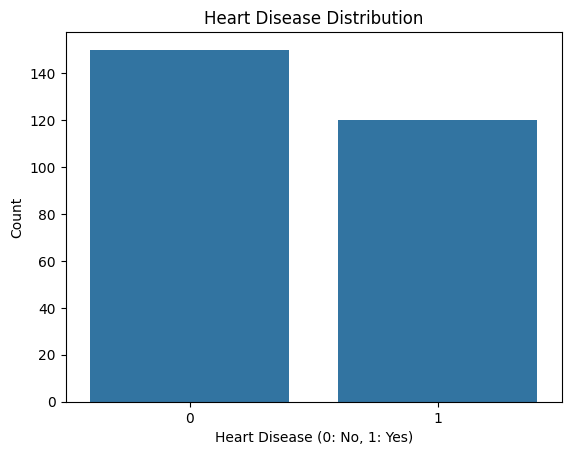

In [7]:
# Melihat distribusi target
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='heart disease', data=df)
plt.title('Heart Disease Distribution')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

In [8]:
df.columns

Index(['age', 'sex ', 'chest pain type', 'resting blood pressure',
       'serum cholestoral', 'fasting blood sugar',
       'resting electrocardiographic results', 'max heart rate',
       'exercise induced angina', 'oldpeak', 'ST segment', 'major vessels',
       'thal', 'heart disease'],
      dtype='object')

In [9]:
columns = ['age', 'sex ', 'chest pain type', 'resting blood pressure',
       'serum cholestoral', 'fasting blood sugar',
       'resting electrocardiographic results', 'max heart rate',
       'exercise induced angina', 'oldpeak', 'ST segment', 'major vessels',
       'thal', 'heart disease']

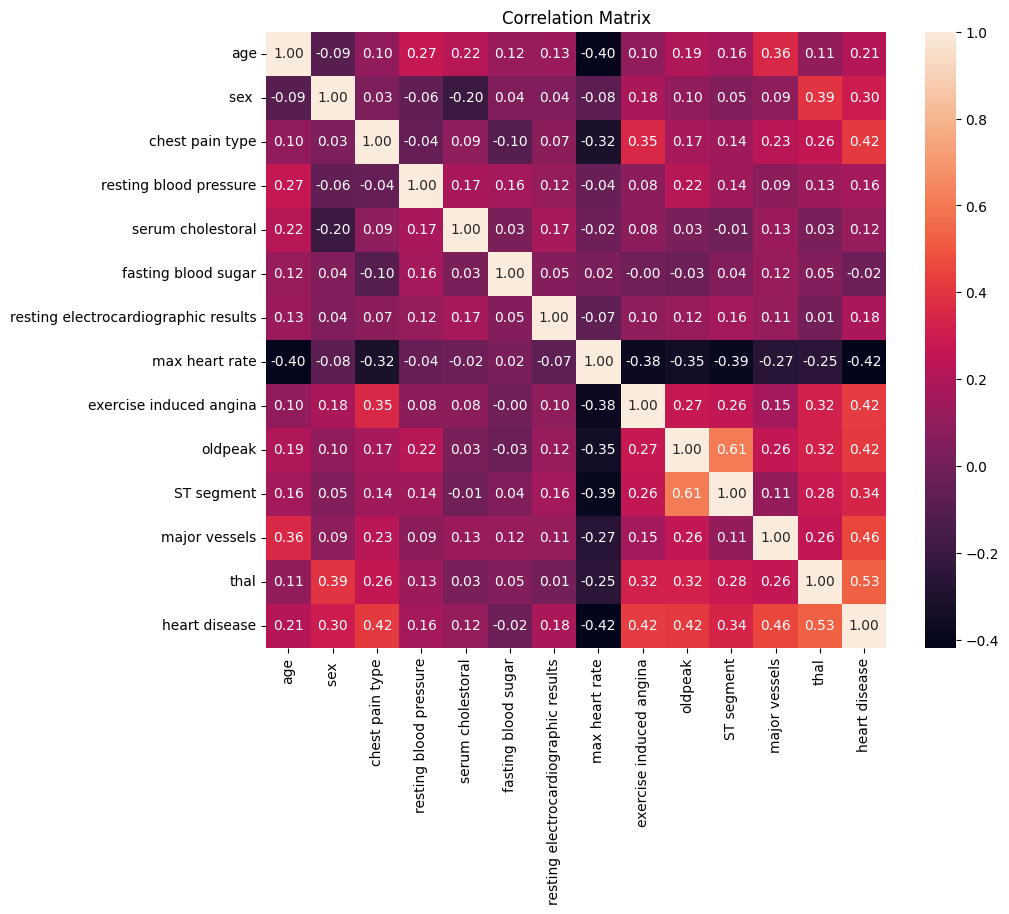

In [10]:
corr_matrix = df.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

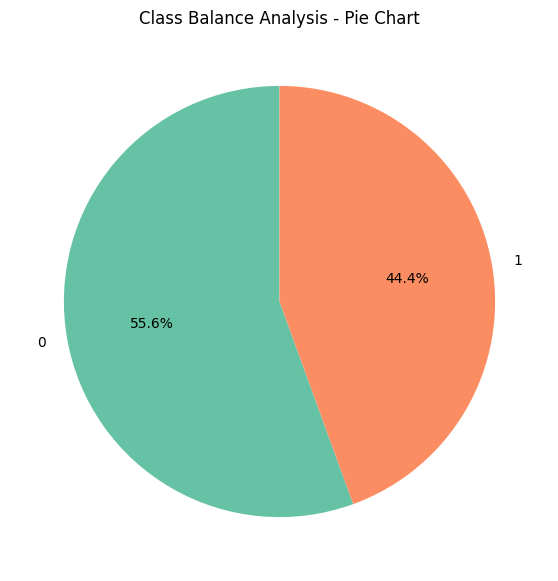

In [11]:
class_counts = df['heart disease'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette('Set2'))
plt.title('Class Balance Analysis - Pie Chart')
plt.show()

In [12]:
# Normalization
unnormalized = df[['resting blood pressure','serum cholestoral','max heart rate']]

scaler = MinMaxScaler()
normalized = scaler.fit_transform(unnormalized)

df[['resting blood pressure', 'serum cholestoral', 'max heart rate']] = normalized
df.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,0.339623,0.447489,0,2,0.290076,0,2.4,2,3,3,1
1,67,0,3,0.198113,1.000000,0,2,0.679389,0,1.6,2,0,7,0
2,57,1,2,0.283019,0.308219,0,0,0.534351,0,0.3,1,0,7,1
3,64,1,4,0.320755,0.312785,0,0,0.259542,1,0.2,2,1,7,0
4,74,0,2,0.245283,0.326484,0,2,0.381679,1,0.2,1,1,3,0


In [13]:
df['ST_vessels'] = df['ST segment'] * df['major vessels']
X = df.drop('heart disease', axis=1)

In [24]:
# Menghitung korelasi dengan target
correlations = df.corr()['heart disease'].drop('heart disease')

# Memilih fitur dengan korelasi absolut di atas threshold
threshold = 0.1
selected_features = correlations[abs(correlations) > threshold].index

# Menampilkan fitur yang terpilih
print("Selected features based on correlation:", selected_features)

# Memperbarui X dengan fitur yang terpilih
X = df[selected_features]

Selected features based on correlation: Index(['age', 'sex ', 'chest pain type', 'resting blood pressure',
       'serum cholestoral', 'resting electrocardiographic results',
       'max heart rate', 'exercise induced angina', 'oldpeak', 'ST segment',
       'major vessels', 'thal', 'ST_vessels'],
      dtype='object')


In [25]:
y = df['heart disease']
X = df.drop('heart disease',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

In [26]:
models = {
    "xGB": XGBClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    results.append({"Model": name, "Accuracy": score})

models_acc = pd.DataFrame(results)
models_acc

,Model,Accuracy
0,xGB,0.838235


In [27]:
y_pred = model.predict(X_test)

train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Train Score: {train_accuracy:.2f}")
print(f"Test Score: {test_accuracy:.2f}")
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Train Score: 1.00
Test Score: 0.84
Model Accuracy: 83.82%


In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Calculate metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC: {auc:.2f}")

Precision: 0.87
Recall: 0.71
F1-Score: 0.78
AUC: 0.82


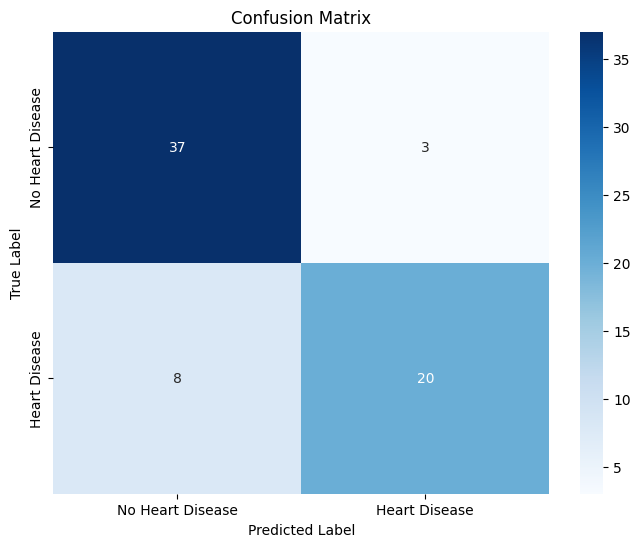

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have y_test (true labels) and y_pred (predicted labels)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [30]:
#Classification Report

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        40
           1       0.87      0.71      0.78        28

    accuracy                           0.84        68
   macro avg       0.85      0.82      0.83        68
weighted avg       0.84      0.84      0.84        68

